# Chuletario de Octave

Este documento está realizado a partir de esta [cheatsheet](http://ais.informatik.uni-freiburg.de/teaching/ws16/mapping/exercise/cheatsheet.pdf) y esta [introducción](http://www-h.eng.cam.ac.uk/help/programs/octave/tutorial).

Para una descripción más detallada, se puede consultar el [manual oficial](https://www.gnu.org/software/octave/doc/v4.2.1).

## Sistema de ayuda

Información sobre un comando específico puede obtenerse utilizando `help`.

In [2]:
help rand

'rand' is a built-in function from the file libinterp/corefcn/rand.cc

 -- rand (N)
 -- rand (M, N, ...)
 -- rand ([M N ...])
 -- V = rand ("state")
 -- rand ("state", V)
 -- rand ("state", "reset")
 -- V = rand ("seed")
 -- rand ("seed", V)
 -- rand ("seed", "reset")
 -- rand (..., "single")
 -- rand (..., "double")
     Return a matrix with random elements uniformly distributed on the
     interval (0, 1).

     The arguments are handled the same as the arguments for 'eye'.

     You can query the state of the random number generator using the
     form

          v = rand ("state")

     This returns a column vector V of length 625.  Later, you can
     restore the random number generator to the state V using the form

          rand ("state", v)

     You may also initialize the state vector from an arbitrary vector
     of length <= 625 for V.  This new state will be a hash based on the
     value of V, not V itself.

     By default, the generator is initialized from '/dev/urando

También podemos buscar una palabra en el texto de ayuda de todas las funciones de `octave` con `lookfor`

In [3]:
lookfor eigenvalues

eig                 Compute the right eigenvalues(V) and optionally the eigenve
                    ctors(lambda) and the left eigenvalues(W) of a matrix or a
                    pair of matrices.
ordschur            Reorders the real Schur factorization (U,S) obtained with t
                    he 'schur' function, so that selected eigenvalues appear in
                    n the upper left diagonal blocks of the quasi triangular Sc
                    chur matrix.
condeig             Compute condition numbers of a matrix with respect to eigen
                    values.
eigs                Calculate a limited number of eigenvalues and eigenvectors 
                    of A, based on a selection criteria.


Las variables definidas en la sesión se pueden consultar con `who`

In [4]:
who

Variables in the current scope:

ans



Y se pueden borrar con `clear`.

Si estamos en un terminal, podemos usar `clc` para borrar la pantalla, y `more off` para desactivar el paginado.

## Entrada de datos

`octave` está orientado a vectores y matrices. Éstos se pueden definir usando corchetes `[]`. 

Los elementos están separados por espacios o comas, y las filas se delimitan con punto y coma.

In [5]:
a = [1,2,3,4]

a =

   1   2   3   4



In [6]:
A = [ 1 2; 3 4]

A =

   1   2
   3   4



El tamaño de una matriz lo podemos obtener con `size`. También podemos usar este comando para ver el tamaño de una fila. Los índices empiezan en 1.

In [7]:
size(A)

ans =

   2   2



In [8]:
size(A,1)

ans =  2


Los rangos se especifican con `:`, y si usamos tres argumentos, el segundo es el incremento.

In [9]:
b=[1:10]

b =

    1    2    3    4    5    6    7    8    9   10



In [10]:
c=[1:0.1:2]

c =

 Columns 1 through 8:

   1.0000   1.1000   1.2000   1.3000   1.4000   1.5000   1.6000   1.7000

 Columns 9 through 11:

   1.8000   1.9000   2.0000



Existen varias funciones predefinidas que crean matrices:

- `zeros` crea una matriz de ceros del tamaño especificado,
- `ones` hace los mismo con unos,
- `diag` crea una matriz cuadrada con valores dados en la diagonal,
- `eye` es la matriz identidad.

In [11]:
zeros(2,3)

ans =

   0   0   0
   0   0   0



In [12]:
ones(2,3)

ans =

   1   1   1
   1   1   1



In [13]:
diag([1 2 6])

ans =

Diagonal Matrix

   1   0   0
   0   2   0
   0   0   6



In [14]:
eye(2)

ans =

Diagonal Matrix

   1   0
   0   1



Podemos concatenar matrices y vectores siempre que las dimensiones sean compatibles:
- `[A B]` concatena horizontalmente `A` seguido de `B`,
- `[A ; B]` concatena verticalemente,
- `repmat(A,n,m)` crea `n` por `m` copias de `A`.

In [15]:
[c;c]

ans =

 Columns 1 through 8:

   1.0000   1.1000   1.2000   1.3000   1.4000   1.5000   1.6000   1.7000
   1.0000   1.1000   1.2000   1.3000   1.4000   1.5000   1.6000   1.7000

 Columns 9 through 11:

   1.8000   1.9000   2.0000
   1.8000   1.9000   2.0000



In [16]:
[A A]

ans =

   1   2   1   2
   3   4   3   4



In [17]:
Z=repmat(A,2,3)

Z =

   1   2   1   2   1   2
   3   4   3   4   3   4
   1   2   1   2   1   2
   3   4   3   4   3   4



Podemos crear vectores y matrices con entradas aleatorias:
- `unifrnd` crea una matriz con entradas aleatorias en un intervalo dado,
- `normrnd` hace lo mismo con una variable aleatoria normal con media y desviación típica dadas.

In [18]:
u = unifrnd(5,15,10,1)

u =

   12.8173
   11.1478
    9.2598
    7.1221
    8.2593
    6.3482
    9.5179
    5.0389
    7.2015
   10.2618



In [19]:
N = normrnd(2.5,1.0,3,3)

N =

   1.89767   1.19528   2.06008
   1.73362   1.50698   4.28766
   3.92317   3.97832   0.61273



Se pueden omitir los corchetes en los rangos.

In [20]:
1:3

ans =

   1   2   3



In [21]:
[1:3 5:7]

ans =

   1   2   3   5   6   7



## Acceso a celdas y submatrices

Con `A(i,j)` podemos acceder a la celda `(i,j)` de la matriz `A`. Tanto `i` como `j` pueden ser listas, y por tanto rangos (definidos con `:`). Lo mismo se aplica a vectores.

In [22]:
A(1,2)

ans =  2


In [23]:
A(1,:)

ans =

   1   2



In [24]:
Z(1:2,3:6)

ans =

   1   2   1   2
   3   4   3   4



In [25]:
u(3)

ans =  9.2598


In [26]:
u(1:3:length(u))

ans =

   12.8173
    7.1221
    9.5179
   10.2618



In [27]:
u([1 3 5])

ans =

   12.8173
    9.2598
    8.2593



## Guardar, borrar y recuperar variables

In [28]:
save A
clear A
load A
A

A =

   1   2
   3   4



## Operaciones con matrices

La transposición se denota usando `'`, la suma `+`, el producto `*`, la potencia por un entero con `^`.

Para el inverso podemos usar `inv` o `^(-1)`.

In [29]:
A^(-1)*A

ans =

   1.00000   0.00000
   0.00000   1.00000



Podemos hacer operaciones a nivel de celdas si usamos `.`.

In [30]:
A .* A

ans =

    1    4
    9   16



In [31]:
A*A

ans =

    7   10
   15   22



Se pueden dividir matrices, `A/B` se interpreta como `A*B^(-1)`. 
También existe el operador `\`, que se interpreta como `A\B=A^(-1)*B`. Ésto es especialmente útil para resolver sistemas de ecuaciones.

In [32]:
b=[1 2]';
x=A\b

x =

   0.00000
   0.50000



In [33]:
A*x

ans =

   1
   2



También está permitido operar con escalares, lo que hará que se operen todas las celdas por dicho escalar.

In [34]:
2*A

ans =

   2   4
   6   8



In [35]:
2+A

ans =

   3   4
   5   6



In [36]:
3+zeros(1,5)

ans =

   3   3   3   3   3



A una matriz le podemos aplicar otro tipo de funciones de un solo argumentos, haciendo así que la función se evalue celda a celda.

In [37]:
cos(A)

ans =

   0.54030  -0.41615
  -0.98999  -0.65364



In [38]:
sqrt(A)

ans =

   1.0000   1.4142
   1.7321   2.0000



Para calcular el determinante, usamos `det`; para la traza `trace` y para el rango `rank`.

In [39]:
det(A)
trace(A)
rank(A)

ans = -2
ans =  5
ans =  2


Los valores propios los podemos calcular con `eig`.

In [40]:
eig(A)

ans =

  -0.37228
   5.37228



Si queremos los vectores propios, guardamos la salida en una lista con dos argumentos.

In [41]:
[v,l]=eig(A)

v =

  -0.82456  -0.41597
   0.56577  -0.90938

l =

Diagonal Matrix

  -0.37228         0
         0   5.37228



El núcleo de la matriz se puede calcular con `null`.

In [42]:
null(A)

ans = [](2x0)


In [43]:
AA = [1 -1; 2 -2];
v=null(AA)
AA*v

v =

  -0.70711
  -0.70711

ans =

   0
   0



La forma reducida de Hermite se puede calcular con `rref`.

In [44]:
rref([1 2 3; 4 5 6])

ans =

   1   0  -1
   0   1   2



Este comando puede ser de especial interés si lo utilizamos con una matriz ampliada, pues sirve para resolver sistemas de ecuaciones lineales de una forma alternativa a la vista anteriormente.

In [46]:
red=rref([A b])
x=red(:,3)

red =

   1.00000   0.00000   0.00000
   0.00000   1.00000   0.50000

x =

   0.00000
   0.50000



## Comparaciones

La comparación de vectores (y matrices) se hace celda a celda, si queremos hacer una comparación global podemos usar `all`.

La salida será `1` si la comparación es cierta y `0` en caso contrario.

In [63]:
[1,2,3]==[1:3]

ans =

  1  1  1



In [64]:
all([1,2,3]==[1:3])

ans = 1


El análogo a `all` para "existe algún elemento cumpliendo la condición" es `any`

In [66]:
any([1,2,3]==[1,1,1])

ans = 1


In [67]:
any([1,2,3]<[1,1,1])

ans = 0


La desigualdad se denota por `~=`.

In [15]:
1~=2

ans = 1


## Programación

Las funciones tienen la siguiente estructura:
```
function [retval1, retval2, ...] <nombre_función>(arg1, arg2, ...)
    <cuerpo de la función>
end
```
Para devolver una valor, asignamos a `retvaln` un valor en el cuerpo de la función. La ayuda de la función la podemos poner como un comentario bajo la primera línea.

In [12]:
function y = suma_dos_numeros(a,b)
% suma_dos_numeros hace lo que el nombre dice
    y = a+b
end

In [13]:
suma_dos_numeros(2,3)

y =  5
ans =  5


In [14]:
help suma_dos_numeros

'suma_dos_numeros' is a command-line function

 suma_dos_numeros hace lo que el nombre dice


Additional help for built-in functions and operators is
available in the online version of the manual.  Use the command
'doc <topic>' to search the manual index.

Help and information about Octave is also available on the WWW
at http://www.octave.org and via the help@octave.org
mailing list.


Los bucles `for` tienen la siguiente forma:
```
for i=lista
    <cuerpo for>
endfor
```

La sintaxis de `if` es `if ... then ... else ... endif`. También podemos introducir `elseif` antes de `else`. 

In [54]:
for i=[1:3]
    if mod(i,2)==0
        disp(['par: ' num2str(i)])
    else
        disp(['impar: ' num2str(i)])
    endif
endfor

impar: 1
par: 2
impar: 3


Parma más de una opción, es mejor usar `switch`.

In [8]:
for i=1:7 
    switch mod(i,3)
        case 0
            disp([num2str(i) " es divisible por tres"])
        case 1 
            disp([num2str(i) " tiene resto uno módulo tres"])
        otherwise
            disp("caso díscolo")
    end
endfor
    

1 tiene resto uno módulo tres
caso díscolo
3 es divisible por tres
4 tiene resto uno módulo tres
caso díscolo
6 es divisible por tres
7 tiene resto uno módulo tres


Podemos también hacer bucles con `while`.

In [11]:
i=1;
p = 1;
while i<10
    p=p*i;
    i=i+1;
end
p

p =  362880


Es conveniente vectorizar siempre que se pueda. Pongamos un ejemplo con producto escalar.

Hemos usado `;` para inhibir las salidas intermedias.

In [58]:
pe = 0;
v1 = [1:10];
v2 = ones(1,10);
for i=1:length(v1)
    pe = pe + v1(i)*v2(i);
endfor
pe

pe =  55


Que se puede hacer de forma más compacta (y eficiente) como

In [57]:
pe = sum(v1.*v2)

pe =  55


Los ficheros con órdenes de `octave` (guiones) se pueden guardar con la extensión `.m`. Para cargarlos, basta con teclear en la consola el nombre del fichero sin la extensión. Con `what` podemos ver los ficheros que hay en el directorio de trabajo.

## Gráficas (básico)

Como ejemlo vamos a pintar la función $\sin(x)$.

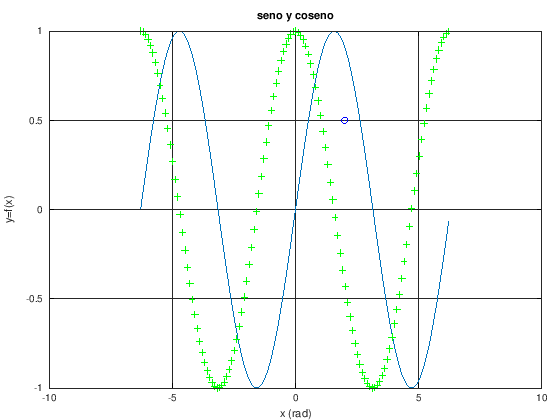

In [81]:
x= -2*pi:0.1:2*pi;
y=sin(x);
% pintamos el seno
plot(x,y)
% eviramos que los siguientes comandos borren la gráfica actual
hold on
% pintamos coseno en verde y con cruces (+)
plot(x,cos(x),'+g')
% pintamos un punto azul
plot(2,0.5,'ob')
% ponemos un título y etiquetas a los ejes
title("seno y coseno")
xlabel("x (rad)")
ylabel("y=f(x)")
% pintamos una malla
grid on

Se puede guardar el gráfico con `print("fichero",'-dpng')` (en formato png).

Se pueden 'concatenar' varios dibujos en un mismo `plot`

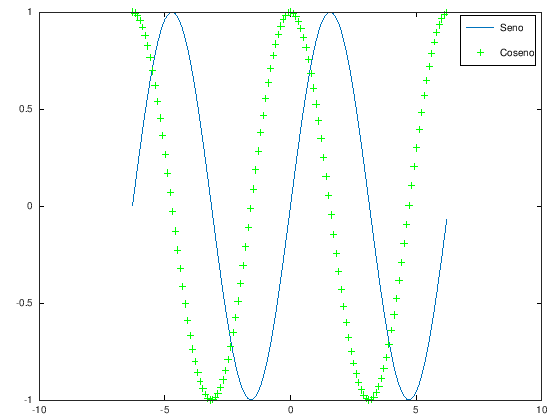

In [2]:
x= -2*pi:0.1:2*pi;
plot(x,sin(x),x,cos(x),'+g')
legend("Seno","Coseno")